## Dataset Summary:
**Data compiled by** JOSEPHW20

**Data Available for download here:** https://www.kaggle.com/datasets/josephw20/uk-met-office-weather-data 

**Copyright Information:** 
All information regarding MET Office copyright policy can be found at: https://www.metoffice.gov.uk/about-us/legal#licences
All data was sourced from: https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data

### Columns in the dataset:
* year: Year in which the measurements were taken <br> 
* month: Month in which the measurements were taken<br> 
* tmax: Mean daily maximum temperature (°C)<br> 
* tmin: Mean daily minimum temperature (°C)<br> 
* af: Days of air frost recorded that month (days)<br> 
* rain: Total rainfall (mm)<br> 
* sun: Total sunshine duration (hours)<br> 
* station: Station location where measurement was recorded

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv(r"C:\Users\aa1\Desktop\python_projects\Weather Predictions\UK Weather\MET Office Weather Data.csv")

In [75]:
df.describe()

,year,month,tmax,tmin,af,rain,sun
count,37029.000000,37029.000000,35430.000000,35507.000000,34080.000000,35551.000000,27546.000000
mean,1968.716276,6.487402,12.705699,5.926955,3.486385,73.421774,118.486343
std,36.936725,3.452393,5.024016,4.058164,5.194166,48.561530,63.367007
min,1853.000000,1.000000,-0.900000,-8.600000,0.000000,0.000000,2.800000
25%,1949.000000,3.000000,8.500000,2.700000,0.000000,39.400000,64.700000
50%,1976.000000,6.000000,12.400000,5.500000,1.000000,63.000000,111.900000
75%,1997.000000,9.000000,16.800000,9.400000,6.000000,95.600000,163.775000
max,2020.000000,12.000000,28.300000,17.000000,31.000000,568.800000,350.300000


In [3]:
df.head(20)

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.7,NaN,aberporth
1,1941.0,2.0,NaN,NaN,NaN,69.1,NaN,aberporth
2,1941.0,3.0,NaN,NaN,NaN,76.2,NaN,aberporth
3,1941.0,4.0,NaN,NaN,NaN,33.7,NaN,aberporth
4,1941.0,5.0,NaN,NaN,NaN,51.3,NaN,aberporth
5,1941.0,6.0,NaN,NaN,NaN,25.7,NaN,aberporth
6,1941.0,7.0,NaN,NaN,NaN,53.9,NaN,aberporth
7,1941.0,8.0,NaN,NaN,NaN,91.8,NaN,aberporth
8,1941.0,9.0,NaN,NaN,NaN,25.5,NaN,aberporth
9,1941.0,10.0,NaN,NaN,NaN,106.2,NaN,aberporth


In [4]:
len(df)

37049

In [5]:
df['station'].value_counts()

station
oxford          2010
armagh          2010
stornoway       1764
southampton     1745
durham          1686
sheffield       1650
bradford        1350
eskdalemuir     1314
wickairport     1278
lowestoft       1268
tiree           1110
nairn           1076
lerwick         1075
valley          1075
rossonwye       1075
aberporth        954
manston          949
shawbury         894
waddington       882
heathrow         870
chivenor         774
leuchars         762
hurn             762
braemar          739
paisley          738
newtonrigg       738
cambridge        738
eastbourne       738
whitby           714
ballypatrick     709
ringway          707
yeovilton        670
cwmystwyth       619
dunstaffnage     590
cardiff          514
camborne         502
Name: count, dtype: int64

In [6]:
distinct_stations = pd.Series(df['station']).drop_duplicates().tolist()
print(distinct_stations)

['aberporth', 'armagh', 'ballypatrick', 'bradford', 'braemar', 'camborne', 'cambridge', 'cardiff', 'chivenor', 'cwmystwyth', 'dunstaffnage', 'durham', 'eastbourne', 'eskdalemuir', 'heathrow', 'hurn', 'lerwick', 'leuchars', 'lowestoft', 'manston', 'nairn', 'newtonrigg', 'oxford', 'paisley', 'ringway', 'rossonwye', 'shawbury', 'sheffield', 'southampton', 'stornoway', 'tiree', 'valley', 'waddington', 'whitby', 'wickairport', 'yeovilton']


In [7]:
dfnew = df.copy()

In [8]:
labelencoder = OrdinalEncoder()

In [9]:
dfnew['station'] = labelencoder.fit_transform(dfnew[['station']])

In [10]:
dfnew.head()

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.7,NaN,0.0
1,1941.0,2.0,NaN,NaN,NaN,69.1,NaN,0.0
2,1941.0,3.0,NaN,NaN,NaN,76.2,NaN,0.0
3,1941.0,4.0,NaN,NaN,NaN,33.7,NaN,0.0
4,1941.0,5.0,NaN,NaN,NaN,51.3,NaN,0.0


In [11]:
dfnew.isnull().sum()

year         20
month        20
tmax       1619
tmin       1542
af         2969
rain       1498
sun        9503
station       0
dtype: int64

In [12]:
dfnew = dfnew[~(df['year'].isnull()|dfnew['month'].isnull())]

In [13]:
len(dfnew)

37029

In [14]:
dfnew.isnull().sum()

year          0
month         0
tmax       1599
tmin       1522
af         2949
rain       1478
sun        9483
station       0
dtype: int64

In [15]:
dfnew.head()

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.7,NaN,0.0
1,1941.0,2.0,NaN,NaN,NaN,69.1,NaN,0.0
2,1941.0,3.0,NaN,NaN,NaN,76.2,NaN,0.0
3,1941.0,4.0,NaN,NaN,NaN,33.7,NaN,0.0
4,1941.0,5.0,NaN,NaN,NaN,51.3,NaN,0.0


In [16]:
dfnew.corr()

,year,month,tmax,tmin,af,rain,sun,station
year,1.000000,-0.007385,0.047264,0.075264,-0.041626,0.061574,0.033936,-0.061535
month,-0.007385,1.000000,0.240618,0.312388,-0.255590,0.159121,-0.091462,0.000266
tmax,0.047264,0.240618,1.000000,0.940968,-0.726362,-0.171256,0.752759,0.004507
tmin,0.075264,0.312388,0.940968,1.000000,-0.792932,-0.064847,0.626514,0.026207
af,-0.041626,-0.255590,-0.726362,-0.792932,1.000000,-0.018047,-0.480544,-0.043204
rain,0.061574,0.159121,-0.171256,-0.064847,-0.018047,1.000000,-0.374218,-0.085515
sun,0.033936,-0.091462,0.752759,0.626514,-0.480544,-0.374218,1.000000,0.043988
station,-0.061535,0.000266,0.004507,0.026207,-0.043204,-0.085515,0.043988,1.000000


In [18]:
dfcorr = dfnew.corr()

In [19]:
import matplotlib.pyplot as plt

<Axes: >

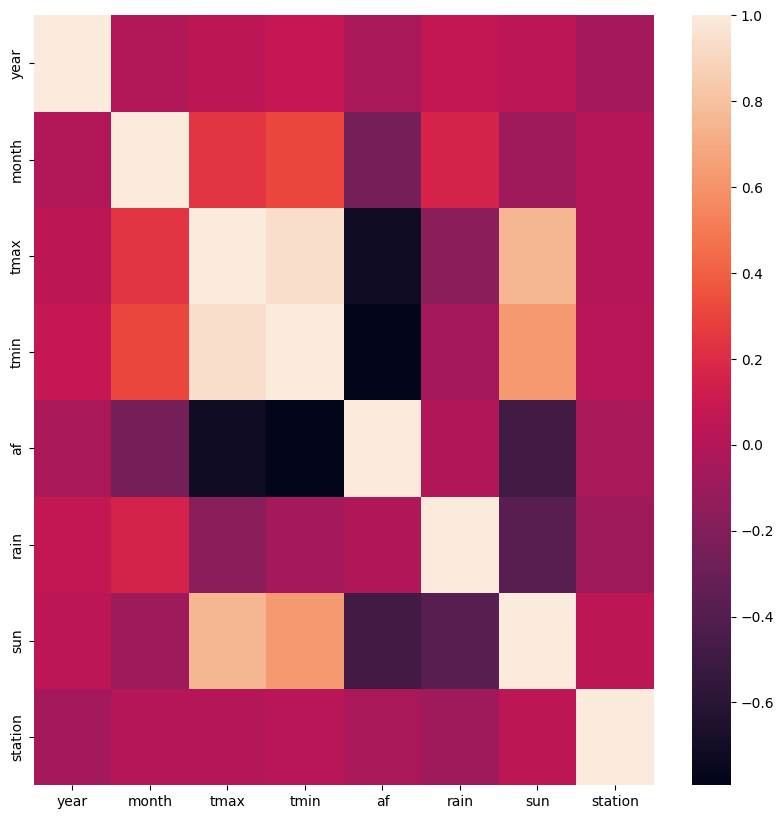

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcorr)

In [22]:
dfnew.columns

Index(['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'station'], dtype='object')

In [26]:
df_for_af = dfnew[['year','month','station','af']]

In [27]:
df_for_af.head()

,year,month,station,af
0,1941.0,1.0,0.0,NaN
1,1941.0,2.0,0.0,NaN
2,1941.0,3.0,0.0,NaN
3,1941.0,4.0,0.0,NaN
4,1941.0,5.0,0.0,NaN


In [41]:
train_data_af = df_for_af.dropna(subset=['af'])

In [74]:
train_data_af.describe()

,year,month,station,af
count,34080.000000,34080.000000,34080.000000,34080.000000
mean,1970.077905,6.487852,18.373445,3.486385
std,36.508928,3.451818,10.462312,5.194166
min,1853.000000,1.000000,0.000000,0.000000
25%,1952.000000,3.000000,10.000000,0.000000
50%,1977.000000,6.000000,20.000000,1.000000
75%,1998.000000,9.000000,28.000000,6.000000
max,2020.000000,12.000000,35.000000,31.000000


In [42]:
predict_data_af = df_for_af[df_for_af['af'].isnull()]

In [43]:
X_af = train_data_af[['year','month','station']]
y_af = train_data_af['af']
X_predict_af = predict_data_af[['year','month','station']]

In [51]:
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(X_af, y_af, test_size=0.2, random_state=42)

In [52]:
neighbors_af = np.arange(1,13)
train_accuracy_af = {}
test_accuracy_af = {}

for neighbor in neighbors_af:
    knn_af = KNeighborsRegressor(n_neighbors=neighbor)
    knn_af.fit(X_train_af, y_train_af)

    train_accuracy_af[neighbor]=knn_af.score(X_train_af, y_train_af)
    test_accuracy_af[neighbor]=knn_af.score(X_test_af, y_test_af)

print(neighbors_af, '\n', train_accuracy_af, '\n', test_accuracy_af)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8196358187758712, 3: 0.7919568042033279, 4: 0.7777075510088728, 5: 0.7606715560851712, 6: 0.7367856528613286, 7: 0.7120936557977334, 8: 0.6901186093101692, 9: 0.674609974704595, 10: 0.6602546864432569, 11: 0.6479618535943807, 12: 0.6369955481952534} 
 {1: 0.2521172022251461, 2: 0.5035258401346839, 3: 0.5929761270839797, 4: 0.6167908536782005, 5: 0.6146700922576553, 6: 0.5989890994739949, 7: 0.5926427490901269, 8: 0.5837900640698666, 9: 0.5764066170384203, 10: 0.5693558309805667, 11: 0.5624472281580828, 12: 0.5595214657617794}


In [53]:
knn_af = KNeighborsRegressor(n_neighbors=5)
knn_af.fit(X_train_af, y_train_af)

KNeighborsRegressor()

In [57]:
knn_y_predict_af = knn_af.predict(X_test_af)

In [58]:
r2_score(y_test_af,knn_y_predict_af)

0.6146700922576553

In [61]:
tree_af = DecisionTreeRegressor(random_state=42)
tree_af.fit(X_train_af, y_train_af)

DecisionTreeRegressor(random_state=42)

In [63]:
tree_y_predict = tree_af.predict(X_test_af)

In [64]:
r2_score(y_test_af,tree_y_predict)

0.49232729779363915

In [56]:
forest_af = RandomForestRegressor()
forest_af.fit(X_train_af, y_train_af)

RandomForestRegressor()

In [59]:
forest_y_predict = forest_af.predict(X_test_af)

In [60]:
r2_score(y_test_af, forest_y_predict)

0.7165133931319778

In [65]:
hist_af = HistGradientBoostingRegressor()
hist_af.fit(X_train_af, y_train_af)

HistGradientBoostingRegressor()

In [66]:
hist_y_predict = hist_af.predict(X_test_af)

In [67]:
r2_score(y_test_af,hist_y_predict)

0.7589850267526626

In [69]:
predictions_af = hist_af.predict(X_predict_af)

In [70]:
dfnew.head()

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.7,NaN,0.0
1,1941.0,2.0,NaN,NaN,NaN,69.1,NaN,0.0
2,1941.0,3.0,NaN,NaN,NaN,76.2,NaN,0.0
3,1941.0,4.0,NaN,NaN,NaN,33.7,NaN,0.0
4,1941.0,5.0,NaN,NaN,NaN,51.3,NaN,0.0


In [71]:
dfnew.loc[df['af'].isnull(), 'af'] = predictions_af

In [73]:
dfnew.head(20)

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,11.873953,74.7,NaN,0.0
1,1941.0,2.0,NaN,NaN,10.836970,69.1,NaN,0.0
2,1941.0,3.0,NaN,NaN,4.572264,76.2,NaN,0.0
3,1941.0,4.0,NaN,NaN,1.094107,33.7,NaN,0.0
4,1941.0,5.0,NaN,NaN,-0.218263,51.3,NaN,0.0
5,1941.0,6.0,NaN,NaN,-0.339256,25.7,NaN,0.0
6,1941.0,7.0,NaN,NaN,-0.339256,53.9,NaN,0.0
7,1941.0,8.0,NaN,NaN,-0.339256,91.8,NaN,0.0
8,1941.0,9.0,NaN,NaN,-0.339256,25.5,NaN,0.0
9,1941.0,10.0,NaN,NaN,0.026545,106.2,NaN,0.0


In [76]:
dfnew.loc[dfnew['af'] < 0, 'af'] = 0

In [77]:
dfnew.head(20)

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,11.873953,74.7,NaN,0.0
1,1941.0,2.0,NaN,NaN,10.836970,69.1,NaN,0.0
2,1941.0,3.0,NaN,NaN,4.572264,76.2,NaN,0.0
3,1941.0,4.0,NaN,NaN,1.094107,33.7,NaN,0.0
4,1941.0,5.0,NaN,NaN,0.000000,51.3,NaN,0.0
5,1941.0,6.0,NaN,NaN,0.000000,25.7,NaN,0.0
6,1941.0,7.0,NaN,NaN,0.000000,53.9,NaN,0.0
7,1941.0,8.0,NaN,NaN,0.000000,91.8,NaN,0.0
8,1941.0,9.0,NaN,NaN,0.000000,25.5,NaN,0.0
9,1941.0,10.0,NaN,NaN,0.026545,106.2,NaN,0.0
